
## **🚀 Principio GRASP: Controller - Exposición**

 El principio de diseño **GRASP Controller** establece que una clase debe encargarse de manejar las solicitudes de los clientes y coordinar las interacciones entre los objetos del sistema. En otras palabras, el Controller actúa como un intermediario entre la interfaz de usuario y la lógica de negocio, evitando que la interfaz manipule directamente los datos o la lógica del sistema.

Este principio permite una mayor separación de responsabilidades, lo que facilita la mantenibilidad, escalabilidad y modularidad del software. Al utilizar un controlador, se centraliza la gestión de la lógica de negocio, permitiendo cambios sin afectar otras capas del sistema. Además, proporciona un punto único de acceso para gestionar interacciones, lo que mejora la estructura general del código.

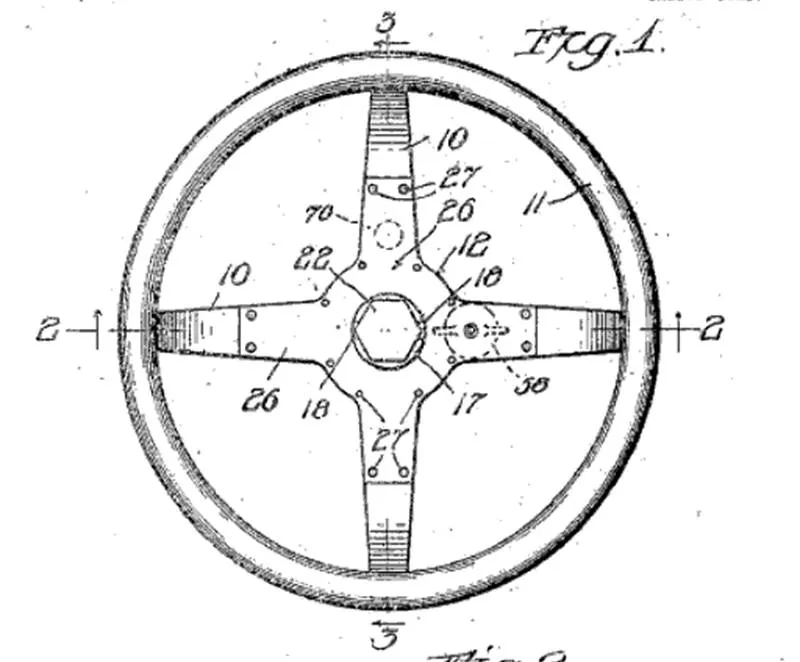



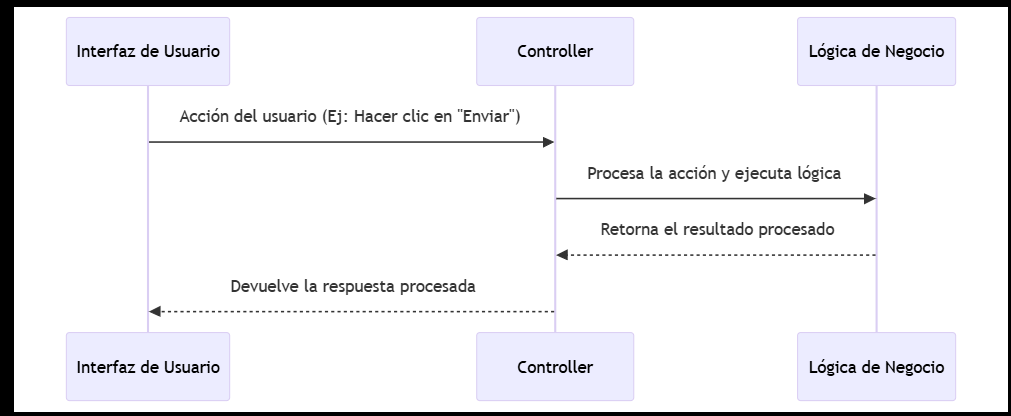


---

## 📝 Caso de Estudio: Sistema de Gestión de Pedidos

Una empresa de comercio electrónico está desarrollando un sistema de gestión de pedidos que permita a los clientes realizar compras en línea de manera eficiente y segura.

El flujo de trabajo del sistema es el siguiente:

1. El usuario realiza un pedido en la tienda en línea..
2. El sistema debe procesar el pedido, verificar el stock y calcular el total.
3. Si el pedido es válido, se confirma y se guarda en la base de datos.
4. El sistema notifica al usuario sobre el estado de su pedido.


🚨  Actualmente, la interfaz de usuario maneja directamente la lógica de los pedidos, lo que genera acoplamiento excesivo y dificulta la reutilización del código. Si se quisiera integrar una API de terceros o una aplicación móvil, la falta de un controlador centralizado haría que cada implementación tuviera que manejar la la lógica de manera independiente, lo que incrementa exponencialmente el riesgo de errores y duplicación de código.




## **🚨 Código que Viola el Principio GRASP Controller**


In [3]:
class Order:
    def __init__(self, user, items):
        self.user = user
        self.items = items
        self.total = 0
        self.is_valid = False

    def calculate_total(self):
        self.total = sum(item['price'] * item['quantity'] for item in self.items)
        return self.total

    def validate_order(self):
        self.is_valid = all(item['stock'] >= item['quantity'] for item in self.items)
        return self.is_valid

# 🚨 La interfaz de usuario maneja la lógica directamente
def process_order(user, items):
    order = Order(user, items)
    total = order.calculate_total()
    if order.validate_order():
        print(f"Pedido confirmado para {user} por un total de ${total}")
    else:
        print("Pedido inválido: No hay suficiente stock.")

# Datos de prueba
user = "John Doe"
items = [
    {"name": "Laptop", "price": 1000, "quantity": 1, "stock": 5},
    {"name": "Mouse", "price": 50, "quantity": 2, "stock": 1}
]

process_order(user, items)

Pedido inválido: No hay suficiente stock.


In [ ]:
import tkinter as tk
from tkinter import messagebox

# 📌 Modelo (Lógica de Negocio)
class Order:
    def __init__(self, user, items):
        self.user = user
        self.items = items
        self.total = 0
        self.is_valid = False

    def calculate_total(self):
        self.total = sum(item['price'] * item['quantity'] for item in self.items)
        return self.total

    def validate_order(self):
        self.is_valid = all(item['stock'] >= item['quantity'] for item in self.items)
        return self.is_valid

# ❌ VIOLACIÓN: La interfaz de usuario maneja la lógica directamente
class OrderGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Sistema de Pedidos")

        # Entrada del usuario
        tk.Label(root, text="Nombre del Cliente:").grid(row=0, column=0)
        self.user_entry = tk.Entry(root)
        self.user_entry.grid(row=0, column=1)

        # Lista de productos
        self.items = [
            {"name": "Laptop", "price": 1000, "stock": 5},
            {"name": "Mouse", "price": 50, "stock": 3},
            {"name": "Teclado", "price": 80, "stock": 2}
        ]

        tk.Label(root, text="Producto:").grid(row=1, column=0)
        self.product_var = tk.StringVar()
        self.product_var.set(self.items[0]["name"])
        self.product_menu = tk.OptionMenu(root, self.product_var, *[item["name"] for item in self.items])
        self.product_menu.grid(row=1, column=1)

        tk.Label(root, text="Cantidad:").grid(row=2, column=0)
        self.quantity_entry = tk.Entry(root)
        self.quantity_entry.grid(row=2, column=1)

        # Botón para procesar pedido
        self.process_button = tk.Button(root, text="Realizar Pedido", command=self.process_order)
        self.process_button.grid(row=3, columnspan=2)

    # ❌ VIOLACIÓN: La GUI está manejando la lógica del negocio directamente
    def process_order(self):
        user = self.user_entry.get()
        product_name = self.product_var.get()
        try:
            quantity = int(self.quantity_entry.get())
        except ValueError:
            messagebox.showerror("Error", "Ingrese una cantidad válida.")
            return

        # Buscar producto seleccionado
        selected_item = next((item for item in self.items if item["name"] == product_name), None)
        if selected_item:
            order = Order(user, [{"name": selected_item["name"], "price": selected_item["price"], "quantity": quantity, "stock": selected_item["stock"]}])
            order.calculate_total()
            if order.validate_order():
                messagebox.showinfo("Pedido Confirmado", f"✅ Pedido confirmado para {user} por un total de ${order.total}")
            else:
                messagebox.showerror("Error", "❌ Pedido inválido: No hay suficiente stock.")
        else:
            messagebox.showerror("Error", "Producto no encontrado.")

# 🚀 Ejecutar la GUI
if __name__ == "__main__":
    root = tk.Tk()
    app = OrderGUI(root)
    root.mainloop()


## **🔴 ¿Por qué este código viola GRASP Controller?**

1. La interfaz de usuario maneja la lógica del negocio.

    - process_order() contiene la validación y cálculo del total, lo que viola la separación de responsabilidades.

2. No hay una clase intermedia que coordine la lógica del pedido.

    - La validación y el cálculo del total deberían manejarse en un controlador dedicado.

3. El código no es reutilizable ni escalable

    - Si en el futuro se agregan pagos o descuentos, habría que modificar process_order() directamente.

4. Dificultad en la integración con otras plataformas.
    - Si se quisiera integrar este sistema con una API o aplicación móvil, habría que duplicar código en cada implementación.


## **✅ Solución: Aplicar GRASP Controller**
Para corregir el problema, introducimos una clase OrderController que centraliza la lógica de negocio y separa la responsabilidad de la interfaz de usuario.

In [2]:
class Order:
    def __init__(self, user, items):
        self.user = user
        self.items = items
        self.total = 0
        self.is_valid = False

    def calculate_total(self):
        self.total = sum(item['price'] * item['quantity'] for item in self.items)
        return self.total

    def validate_order(self):
        self.is_valid = all(item['stock'] >= item['quantity'] for item in self.items)
        return self.is_valid

class OrderController:
    def __init__(self, order):
        self.order = order

    def process_order(self):
        self.order.calculate_total()
        if self.order.validate_order():
            print(f"Pedido confirmado para {self.order.user} por un total de ${self.order.total}")
        else:
            print("Pedido inválido: No hay suficiente stock.")

# 🚀 Uso del código refactorizado
user = "John Doe"
items = [
    {"name": "Laptop", "price": 1000, "quantity": 1, "stock": 5},
    {"name": "Mouse", "price": 50, "quantity": 2, "stock": 3}
]

order = Order(user, items)
controller = OrderController(order)
controller.process_order()

Pedido confirmado para John Doe por un total de $1100


## **✅ ¿Por qué esta versión es mejor?**

✅ Separa responsabilidades correctamente – La interfaz de usuario ya no maneja la lógica de negocio.

✅ El controlador coordina la interacción entre objetos – OrderController gestiona el proceso de pedido sin acoplarse a la interfaz.

✅ El código es más reutilizable y escalable – Si en el futuro agregamos métodos de pago o descuentos, solo modificamos OrderController.

✅ Facilita la integración con APIs y aplicaciones móviles – OrderController actúa como un punto centralizado de lógica, permitiendo integraciones más eficientes.

✅ Mejora la mantenibilidad del sistema – Los cambios en la lógica de negocio no afectan la interfaz ni la base de datos.



## **📌 Cuándo se usa GRASP Controller?**

El principio de GRASP Controller se aplica cuando:

- Se necesita centralizar la lógica de negocio, evitando que la interfaz de usuario o la base de datos manejen la lógica directamente.

- Hay múltiples fuentes de entrada (como API, UI y CLI) y se requiere un punto común para gestionar la lógica.

- Se busca mejorar la modularidad y reutilización del código, permitiendo que diferentes interfaces interactúen con la misma lógica sin duplicación.

- El sistema es altamente dinámico, donde múltiples casos de uso pueden compartir lógica común que debe ser gestionada de manera estructurada.

- Se requiere una mejor separación de responsabilidades, evitando que las entidades de la capa de datos se ocupen de la lógica del negocio.

## **📌 ¿Por qué se usa GRASP Controller?**
Este principio es esencial porque permite desacoplar la lógica del negocio de la interfaz de usuario, lo que conlleva a:

- Mayor mantenibilidad: Los cambios en la lógica no afectan la UI ni otras capas del sistema.

- Mayor escalabilidad: Se pueden agregar nuevas funcionalidades sin modificar el flujo central del sistema.

- Mejor organización: Se estructura mejor el código, lo que facilita la lectura y comprensión.

- Integración más sencilla: Se facilita la conexión con otras plataformas, como APIs o aplicaciones móviles, sin alterar la lógica central.

## **📌 Problemas que puede traer**

- ⚠ Si se usa incorrectamente, puede convertirse en un "Dios" que maneja demasiadas responsabilidades, violando el principio de responsabilidad única (SRP).

- ⚠ Si se hace demasiado general, puede volverse inflexible, lo que limita la capacidad de personalizar la lógica en situaciones específicas.

- ⚠ Puede introducir una capa adicional de complejidad, si no se justifica su implementación en sistemas pequeños o simples.

##  **📌 ¿Cómo se complementa o interfiere con otros principios de diseño?**

✅ Se complementa con:

✔ Single Responsibility Principle (SRP) – Garantiza que la interfaz de usuario no asuma responsabilidades que le corresponden a la lógica del negocio.

✔ Dependency Inversion Principle (DIP) – Facilita la inyección de dependencias al desacoplar la UI de la lógica de negocio.

✔ Model-View-Controller (MVC) – Se alinea con este patrón al asignar al Controller la responsabilidad de gestionar la lógica.

✔ Open/Closed Principle (OCP) – Permite extender la lógica del negocio sin modificar las interfaces existentes.

⚠ Puede interferir con:

🔸 Si el Controller crece demasiado, puede volverse monolítico y difícil de gestionar, perdiendo flexibilidad.

🔸 Si se abusa de la delegación, se puede generar sobrecarga de comunicación entre clases, lo que afecta la eficiencia.


## **🎯 Conclusión**

El Principio GRASP Controller mejora la arquitectura del software al separar la lógica de negocio de la interfaz. Aplicarlo correctamente ayuda a crear código modular, extensible y reutilizable, facilitando futuras modificaciones y mejoras.

Implementar controladores en sistemas complejos garantiza una estructura sólida, organizada y preparada para la escalabilidad. ¡Ahora el código es más limpio, mantenible y fácil de escalar! 🚀


## **Fuentes**
- https://medium.com/@ReganKoopmans/understanding-the-grasp-design-patterns-2cab23c7226e
- https://www.youtube.com/watch?v=fGNF6wuD-fg
